In [35]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from IPython.display import clear_output
import time

In [36]:
G = ( lambda x,y,z,w: x**2 + y**2 + z**2 + w**2 - 1, )

In [37]:
G[0](2,0,0,0)

3

In [38]:
def GetVectorF(G,r):
    
    dim = len(G)
    
    v = np.zeros(dim)
    
    v[0] = G[0](r[0],r[1],r[2],r[3])
    
    return v

In [39]:
GetVectorF(G,[2,0,0,0])

array([3.])

In [40]:
def GetMetric(G,r):
    v = GetVectorF(G,r)
    return np.linalg.norm(v)

In [41]:
def GetJacobian(G,r,h=1e-6):
    
    dim = len(G)
      
    J = np.zeros((dim,4))
    
    for i in range(dim):
        J[i,0] = (  G[i](r[0]+h,r[1],r[2],r[3]) - G[i](r[0]-h,r[1],r[2],r[3]) )/(2*h)
        J[i,1] = (  G[i](r[0],r[1]+h,r[2],r[3]) - G[i](r[0],r[1]-h,r[2],r[3]) )/(2*h)
        J[i,2] = (  G[i](r[0],r[1],r[2]+h,r[3]) - G[i](r[0],r[1],r[2]-h,r[3]) )/(2*h)
        J[i,3] = (  G[i](r[0],r[1],r[2],r[3]+h) - G[i](r[0],r[1],r[2],r[3]-h) )/(2*h)
        
    return J.T

In [42]:
GetJacobian(G,[2,0,0,0])

array([[4.],
       [0.],
       [0.],
       [0.]])

In [43]:
def GetSolve(G,r,ix,lr=1e-2,epochs=int(1e5),error=1e-8):
    
    d = 1
    it = 0
    Vector_F = np.array([])
    
    R_vector = np.array(r)
    
    while d > error and it < epochs:
        
        CurrentF = GetMetric(G,r)
        
        J = GetJacobian(G,r)
        
        GVector = GetVectorF(G,r)
        
        r -= lr*np.dot(J,GVector)
        
        NewF = GetMetric(G,r)
        
        Vector_F = np.append(Vector_F,NewF)
        
        d = np.abs( CurrentF - NewF )/NewF
        
        if it%1000 == 0:
            print(it,NewF)
            clear_output(wait=True)
            time.sleep(0.02)
        
        it += 1
    
    if it == epochs:
        print(' Entrenamiento no completado ',ix)
    else:
        print('Completo',ix)

    
    return r,it,Vector_F

In [44]:
N = 500
Sample = np.zeros((N,4))

for i in range(N):
    a = np.random.uniform(-1,1)
    b = np.random.uniform(-1,1)
    c = np.random.uniform(-1,1)
    d = np.random.uniform(-1,1)
    xsol,_,_ = GetSolve(G,[a,b,c,d],i+1)
    Sample[i] = xsol

Completo 500


<IPython.core.display.Javascript object>


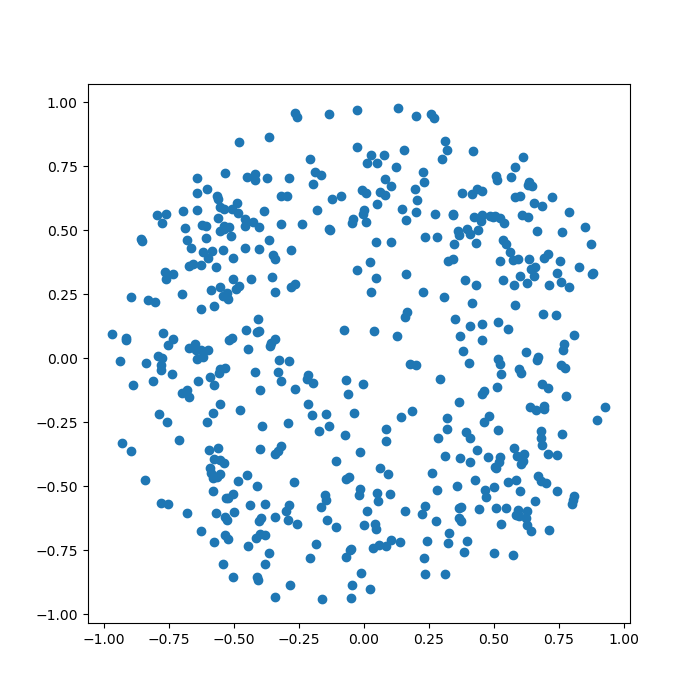

In [45]:
#Sample
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(1,1,1)
ax.scatter(Sample[:,0],Sample[:,1])

<IPython.core.display.Javascript object>


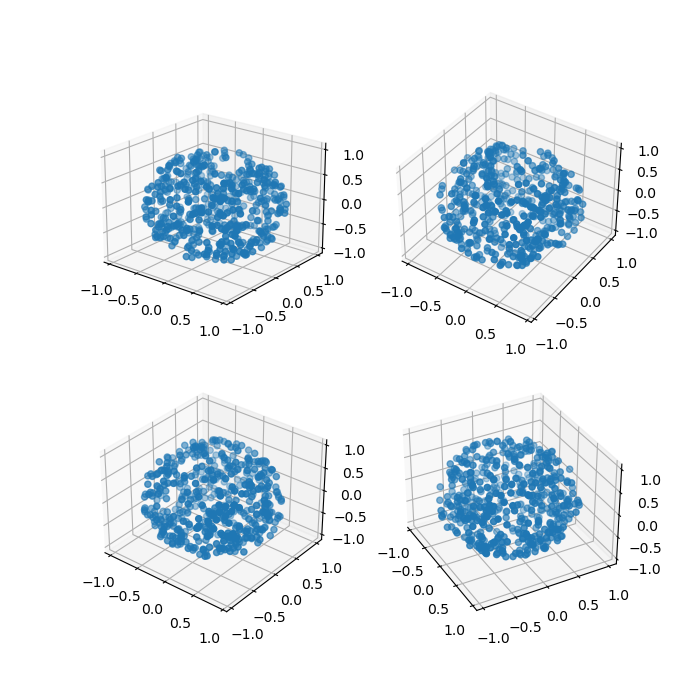

In [46]:
fig = plt.figure(figsize=(7,7))
ax1 = fig.add_subplot(2,2,1,projection='3d')
ax2 = fig.add_subplot(2,2,2,projection='3d')
ax3 = fig.add_subplot(2,2,3,projection='3d')
ax4 = fig.add_subplot(2,2,4,projection='3d')

ax1.scatter(Sample[:,0],Sample[:,1],Sample[:,2])
ax2.scatter(Sample[:,0],Sample[:,1],Sample[:,3])
ax3.scatter(Sample[:,0],Sample[:,2],Sample[:,3])
ax4.scatter(Sample[:,1],Sample[:,2],Sample[:,3])